In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress

In [2]:
GDP_csv = pd.read_csv("GDP.clean")
GDP_df = pd.DataFrame(GDP_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
del GDP_df['Unnamed: 0']
GDP_df.head()

,County,GDP
0,"Autauga, AL",1539406.0
1,"Baldwin, AL",6436107.0
2,"Barbour, AL",743779.0
3,"Bibb, AL",322307.0
4,"Blount, AL",819608.0


In [4]:
del home_ownership_df['Unnamed: 0']
home_ownership_df.head()

,HOR,County
0,73.3,"Autauga, AL"
1,72.9,"Baldwin, AL"
2,62.5,"Barbour, AL"
3,75.4,"Bibb, AL"
4,78.5,"Blount, AL"


In [5]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,HOR,County
0,80.8,"Burnett, WI"
1,68.1,"Lea, NM"
2,75.4,"Bon Homme, SD"
3,71.6,"Newton, MO"
4,73.4,"Pierce, GA"


In [6]:
GDP_analysis = sample_home_ownership.merge(GDP_df, on="County")
GDP_analysis.head()

,HOR,County,GDP
0,80.8,"Burnett, WI",406258.0
1,68.1,"Lea, NM",5172018.0
2,75.4,"Bon Homme, SD",178319.0
3,71.6,"Newton, MO",1591688.0
4,73.4,"Pierce, GA",337792.0


In [7]:
len(GDP_analysis)

631

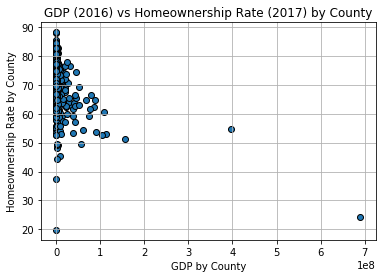

In [8]:
plt.scatter(GDP_analysis["GDP"], GDP_analysis["HOR"], marker="o", edgecolor='black')
plt.title("GDP (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("GDP by County")
plt.grid(True)
plt.savefig('Pictures/GDP_scatter.png')

In [9]:
x = GDP_analysis["GDP"]
y = GDP_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.023
Model:                            OLS   Adj. R-squared (uncentered):              0.021
Method:                 Least Squares   F-statistic:                              14.63
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                    0.000144
Time:                        10:05:37   Log-Likelihood:                         -3584.6
No. Observations:                 631   AIC:                                      7171.
Df Residuals:                     630   BIC:                                      7176.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP         3.066e-07   8.02e-08      3.825      0.000    1.49e-07    4.64e-07
==============================================================================
Omnibus:                      992.162   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           460107.945
Skew:                          -8.956   Prob(JB):                         0.00
Kurtosis:                     134.070   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

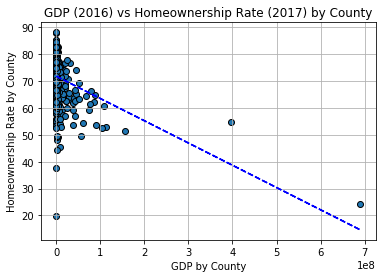

In [11]:
plt.scatter(GDP_analysis["GDP"], GDP_analysis["HOR"], marker="o", edgecolor='black')
plt.title("GDP (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("GDP by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/GDP_regression.png')